# Dissertation
## Chapter 2 
### Cyclic Changing Environments - Entropy

In [26]:
import sys
import glob
import collections

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy  
import scikits.bootstrap as bootstrap
from scipy import stats
import matplotlib.gridspec as gridspec
#from IPython.display import Image
from PIL import Image
from IPython.display import Image as ipyImage

import matplotlib.cm as cm
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline
%rehashx
pd.__version__

u'0.20.3'

In [2]:
## Dataset-specific -- edit me
data_number = "082"
data_name = "Final"

treatments = collections.OrderedDict()
treatments['control'] = 'control'
treatments['noreward'] = 'benign'
treatments['punish'] = 'harsh'

## basic config
#base_path = "/home/rosiec/Dropbox/School_Docs/Papers/Journal\ CE\ Paper/data_analysis/"
base_path = "/home/rosiec/Dropbox/School_Docs/Dissertation/ipython_notebooks/Chapter_2_-_CE/data/"
raw_data_directory = "raw_data"
analysis_directory = "intermediate_data"
scripts_path = "~/Dropbox/School_Docs/Research/research_scripts/"

## generated
data_directory = data_number + "_" + "_".join(data_name.split(" "))
data_path = base_path + raw_data_directory + "/" + data_directory
analysis_path = base_path + analysis_directory

print (data_path)
print (analysis_path)



/home/rosiec/Dropbox/School_Docs/Dissertation/ipython_notebooks/Chapter_2_-_CE/data/raw_data/082_Final
/home/rosiec/Dropbox/School_Docs/Dissertation/ipython_notebooks/Chapter_2_-_CE/data/intermediate_data


In [3]:
%cd {data_path}
%mkdir {analysis_path}
%cd {analysis_path}
%pwd


/Core/home/rosiec/Dropbox/School_Docs/Dissertation/ipython_notebooks/Chapter_2_-_CE/data/raw_data/082_Final
mkdir: cannot create directory ‘/home/rosiec/Dropbox/School_Docs/Dissertation/ipython_notebooks/Chapter_2_-_CE/data/intermediate_data’: File exists
/Core/home/rosiec/Dropbox/School_Docs/Dissertation/ipython_notebooks/Chapter_2_-_CE/data/intermediate_data


u'/Core/home/rosiec/Dropbox/School_Docs/Dissertation/ipython_notebooks/Chapter_2_-_CE/data/intermediate_data'

In [4]:
import sys
sys.path.append({scripts_path})
%run {scripts_path}/quickplot.py --help

Usage: quickplot.py [options] outfile [input_file1 column1 "directory_glob1" name1 .. input_fileN columnN "directory_globN" nameN] 
          


Options:
  -h, --help            show this help message and exit
  -v, --verbose         print extra messages to stdout
  -d, --debug_messages  print debug messages to stdout
  --plotonly            Skip the aggregation step, and plot only, using
                        existing data files.
  --noplot              Skip the plotting step, only aggregate the data files.
  -t TITLE, --title=TITLE
                        set a different title than outfile (default)
  -x XLABEL, --xlabel=XLABEL
                        X-axis Label
  -y YLABEL, --ylabel=YLABEL
                        Y-axis Label
  --include_chevrons    Include line marker glyphs in addition to color
  --chevrons_by_members
                        Make the chevrons track by members, along with line
                        style
  --data_members=MEMBER_COUNT
                        N

 # Per-Site and Population Genotypic Entropy - From Script
 
#### Generated the per-site entropies from the raw data
```bash
     rosiec@Loki:/Volumes/rosiec/__research/devolab_research/evolution_of_modularity/raw_data/082/populations/punish_intertwined_820001$ python ../../../../../scripts/graph_generation/plot_by_site_entropy.py --show --title "Hostile Treatment" by_site_entropy__hostile__for_poster.png by_site_entropy.csv
```

##### Generate the figures from the command line

```bash
    rosiec@Loki:/Volumes/rosiec/__research/devolab_research/evolution_of_modularity/raw_data/082/populations/noreward_intertwined_820001$ python ../../../../../scripts/graph_generation/plot_by_site_entropy.py --show --title "Benign Treatment" by_site_entropy__benign__for_poster.png by_site_entropy.csv
```
    

~/Dropbox/School_Docs/Research/research_scripts/graph_generation/plot_by_site_entropy.py --xsize 1560 --ysize 900 --title "Population Entropy by Site and Genotype

Control (Static) Environment" control__entropy.png /home/rosiec/Dropbox/School_Docs/Dissertation/ipython_notebooks/Chapter_2_-_CE/data/raw_data/082_Final/populations/control_intertwined_820001/by_site_entropy.csv
4001


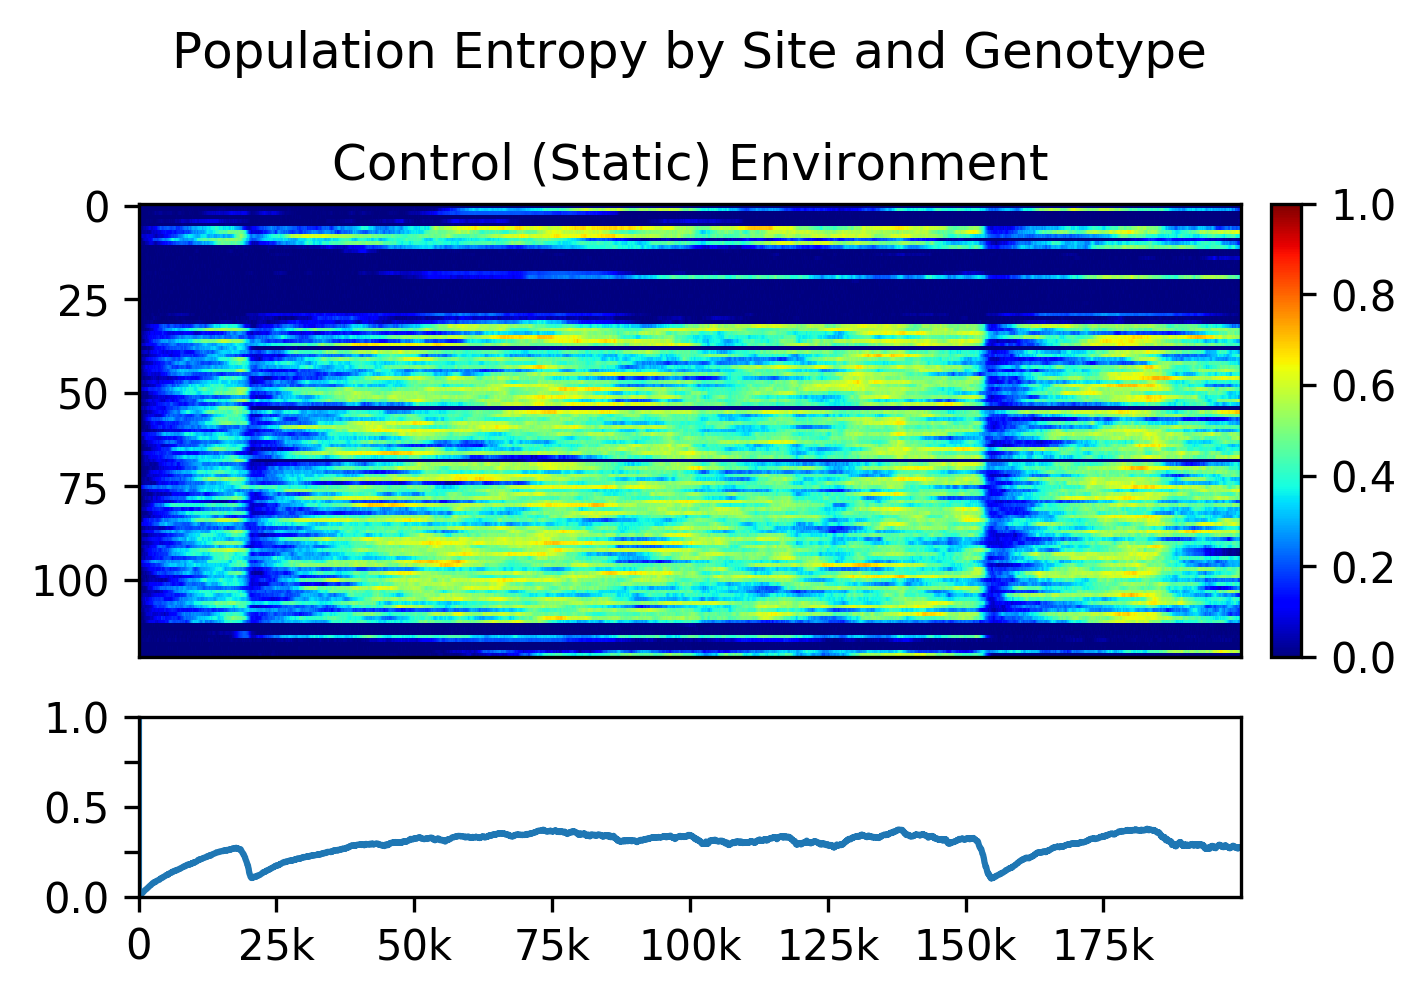

In [16]:
datafiles = ""
subdir = "/populations/control_intertwined_820001/"

script = scripts_path + 'graph_generation/plot_by_site_entropy.py '
#script += '--horizontal '
script += '--xsize 1560 --ysize 900 '
#script += '--legend '
#script += '--ylabel1 "Genome Site" '
#script += '--ylabel2 "Mean\nEntropy" '
#script += '--xlabel "Updates" '
#script += '--ylim 1000 '
script += '--title "Population Entropy by Site and Genotype\n\nControl (Static) Environment" '
script += 'control__entropy.png '
script += data_path + subdir + "by_site_entropy.csv" 

print (script)

!python2 $script

ipyImage('control__entropy.png') 

~/Dropbox/School_Docs/Research/research_scripts/graph_generation/plot_by_site_entropy.py --xsize 1560 --ysize 900 --ylabel1 "Genome Locus
(Instruction Site)" --ylabel2 "Mean
Entropy" --title "Benign Environment" benign__entropy.png /home/rosiec/Dropbox/School_Docs/Dissertation/ipython_notebooks/Chapter_2_-_CE/data/raw_data/082_Final/populations/noreward_intertwined_820001/by_site_entropy.csv
4001


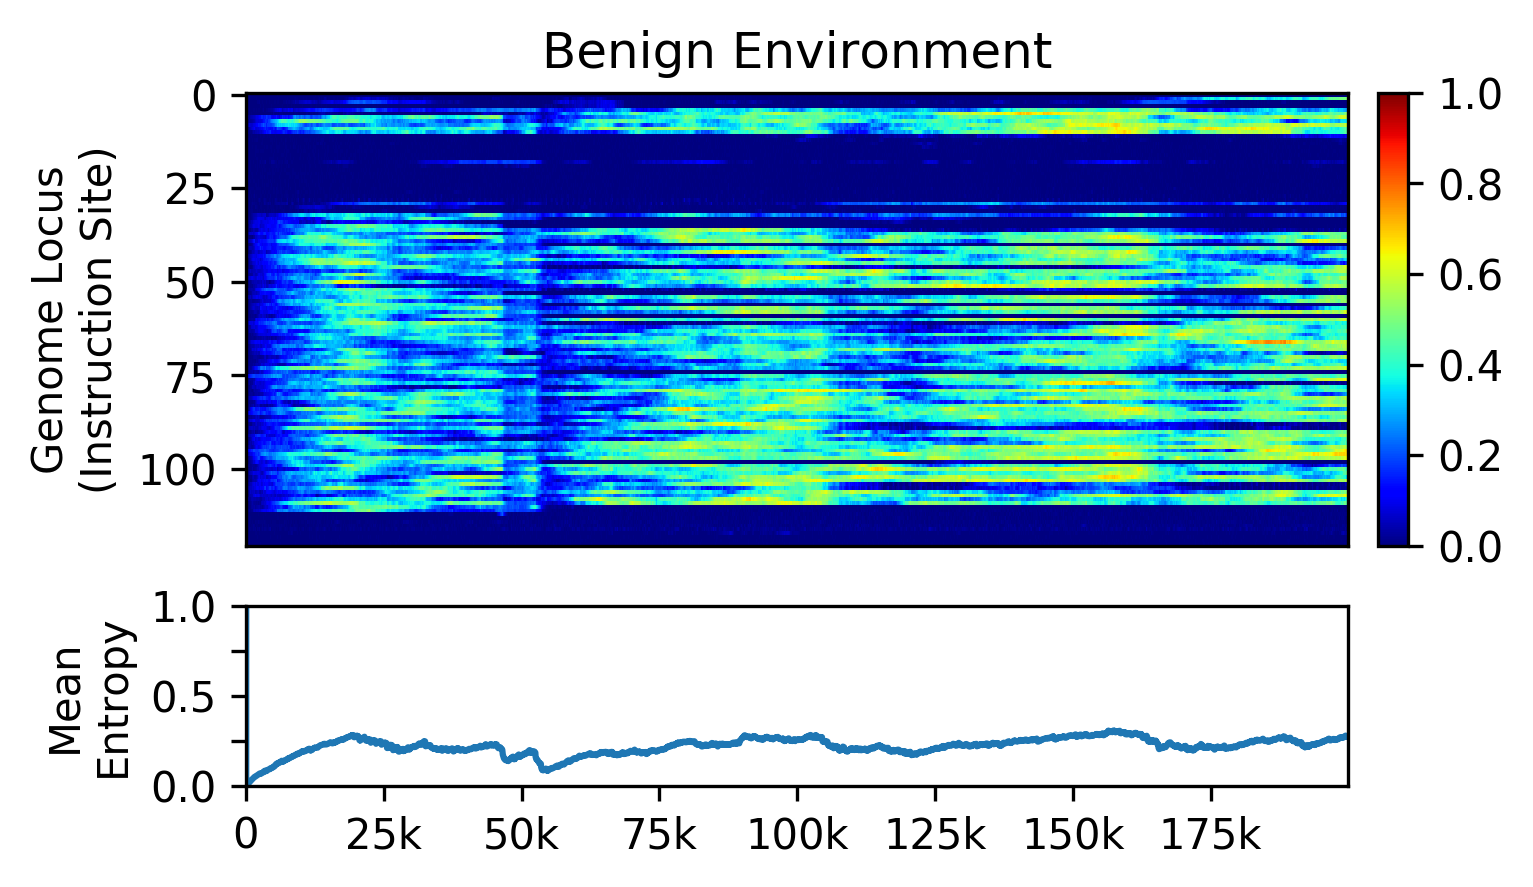

In [17]:
datafiles = ""
subdir = "/populations/noreward_intertwined_820001/"

script = scripts_path + 'graph_generation/plot_by_site_entropy.py '
#script += '--horizontal '
script += '--xsize 1560 --ysize 900 '
#script += '--legend '
script += '--ylabel1 "Genome Locus\n(Instruction Site)" '
script += '--ylabel2 "Mean\nEntropy" '
#script += '--xlabel "Updates" '
#script += '--ylim 1000 '
script += '--title "Benign Environment" '
script += 'benign__entropy.png '
script += data_path + subdir + "by_site_entropy.csv" 

print (script)

!python2 $script

ipyImage('benign__entropy.png') 

~/Dropbox/School_Docs/Research/research_scripts/graph_generation/plot_by_site_entropy.py --xsize 1560 --ysize 900 --xlabel "Time (Updates)" --title "Harsh Environment" harsh__entropy.png /home/rosiec/Dropbox/School_Docs/Dissertation/ipython_notebooks/Chapter_2_-_CE/data/raw_data/082_Final/populations/punish_intertwined_820001/by_site_entropy.csv
4001


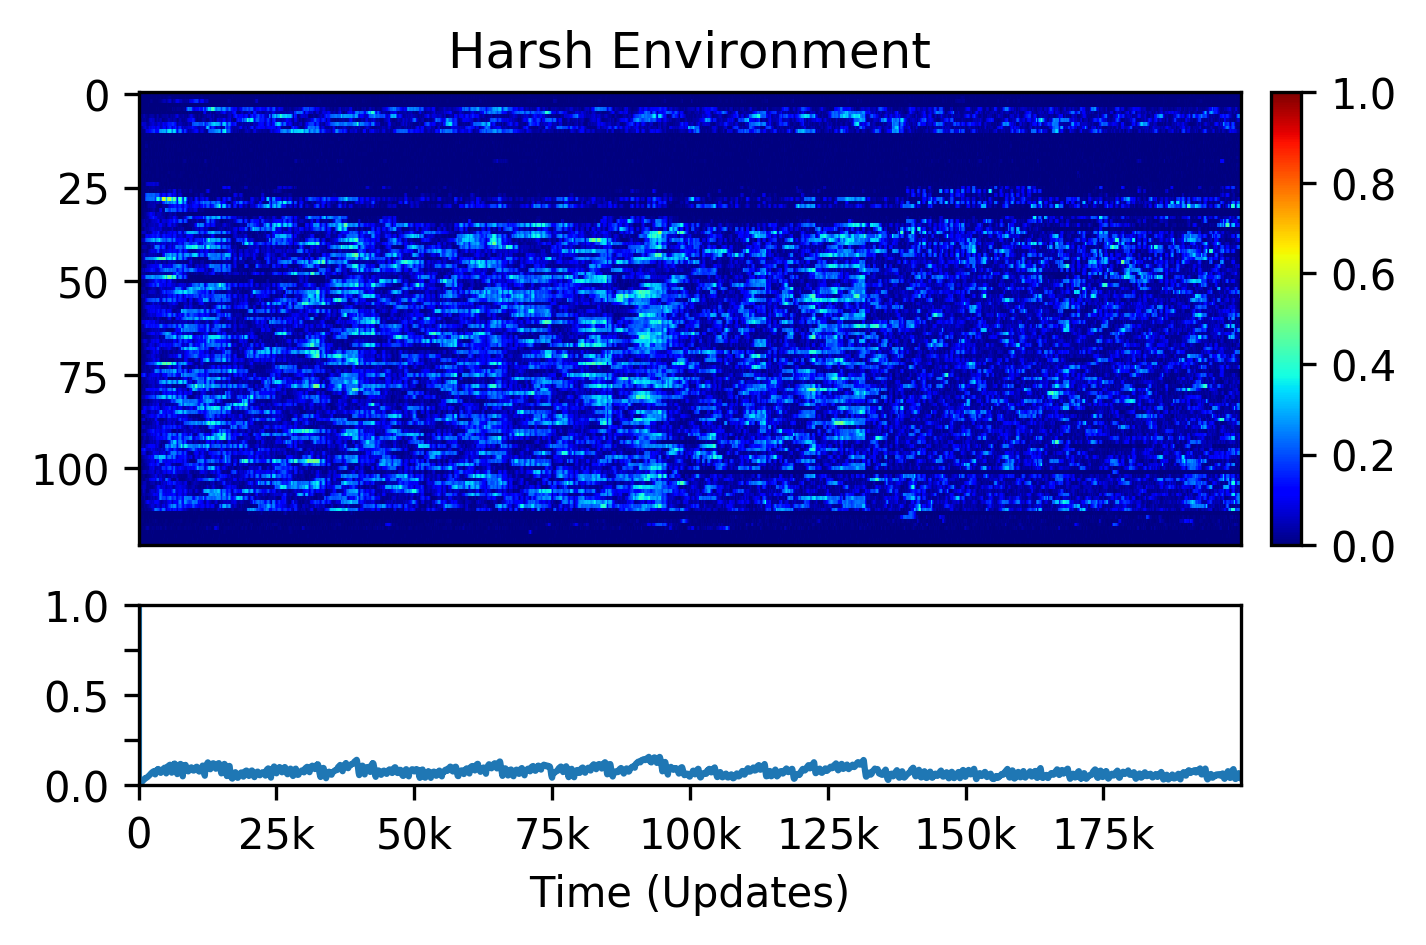

In [18]:
datafiles = ""
subdir = "/populations/punish_intertwined_820001/"

script = scripts_path + 'graph_generation/plot_by_site_entropy.py '
#script += '--horizontal '
script += '--xsize 1560 --ysize 900 '
#script += '--legend '
#script += '--ylabel1 "Genome Site" '
#script += '--ylabel2 "Mean\nEntropy" '
script += '--xlabel "Time (Updates)" '
#script += '--ylim 1000 '
script += '--title "Harsh Environment" '
script += 'harsh__entropy.png '
script += data_path + subdir + "by_site_entropy.csv" 

print (script)

!python2 $script

ipyImage('harsh__entropy.png') 

## Generate Data

In [41]:
def get_data(subdir):
    inputfilename = data_path + subdir + "by_site_entropy.csv"

    ## regular defaults
    if inputfilename[-3:] == ".gz":
        fd = gzip.open(inputfilename)
    else:
        fd = open(inputfilename)

    ## read the file
    mean_fitnesses = []
    max_fitnesses = []
    all_entropies = []

    line_ct = 0
    for line in fd:
        line = line.strip()
        if len(line) == 0 or line[0] == "#":
            continue

        line = line.split(',')

        line = [float(bit) for bit in line]


        if line_ct == 1:
            mean_fitnesses = line
        elif line_ct == 2:
            max_fitnesses = line
        else:
            all_entropies.append( line )
            #print all_entropies[-1]

        line_ct += 1

    return all_entropies

In [83]:
def do_fig(xsize=None, ysize=None, 
           title=None, 
           ylabel=None, xlabel=None, data=None):
    all_entropies = data
    
    ### plot the thing
    sum_normalized_entropy = [ sum(entropies)/float(len(entropies)) for entropies in all_entropies ]
    sum_norm_plottable = np.array( sum_normalized_entropy )

    ##transpose
    all_entropies_tp = zip(*all_entropies)

    ent_plottable = np.array( all_entropies )
    ent_plottable = np.transpose( ent_plottable )
    
    if (xsize and ysize):
        my_dpi = 300
        fig = plt.figure(figsize=(xsize/my_dpi, ysize/my_dpi), dpi=my_dpi)
    else:
        fig = plt.figure()

    ax = fig.add_subplot(111) ## 2 row, 1 column, first plot
    #ax.set_adjustable('box')
    #ax.set_aspect('auto')
    #ax.imshow(ent_plottable, cmap=cm.jet, interpolation='nearest')
    thing = ax.imshow(all_entropies_tp, cmap=cm.jet, interpolation='nearest', aspect="auto",
            norm = colors.Normalize(vmin = 0.0, vmax = 1.0, clip = False))
    #fig.colorbar(thing)



    
    xlocs, xlabels = plt.xticks()
    xmodlabels = []
    xmodlocs = []
    for i in range(0, len(xlocs)-1):
        xmodlocs.append( xlocs[i] )
        if i == 0:
            xmodlabels.append(int(xlocs[i]))
        else:
            xmodlabels.append(str(int(xlocs[i]*50)/1000) + "k")
    plt.xticks( xmodlocs, xmodlabels )
    
    if title:
        plt.title(title)
    if ylabel:
        plt.ylabel(ylabel) 
    if xlabel:
        plt.xlabel( xlabel )
    
    ax.set_xlim([0, len(sum_normalized_entropy)-1])
    
    divider = make_axes_locatable( ax )
    ax_cb = divider.append_axes("right", 0.1, pad=0.1)
    fig.colorbar(thing, cax=ax_cb)    
    
#    plt.xticks( [], [] )
    
  

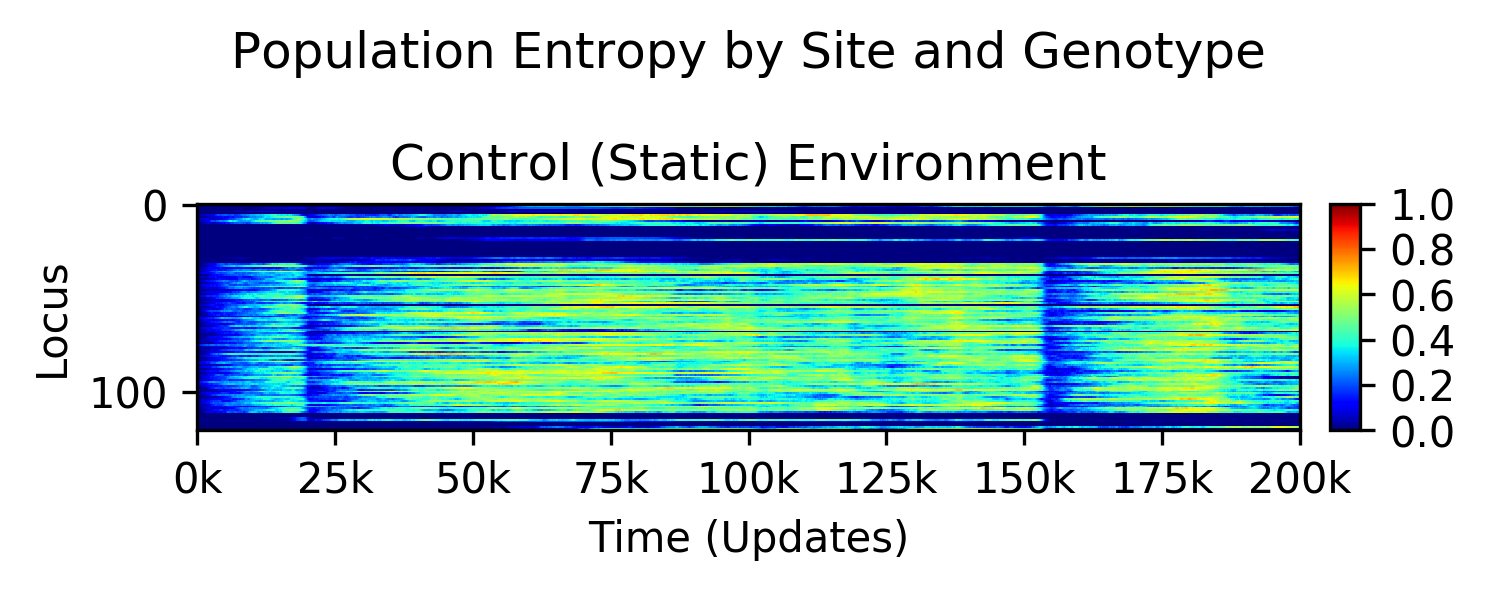

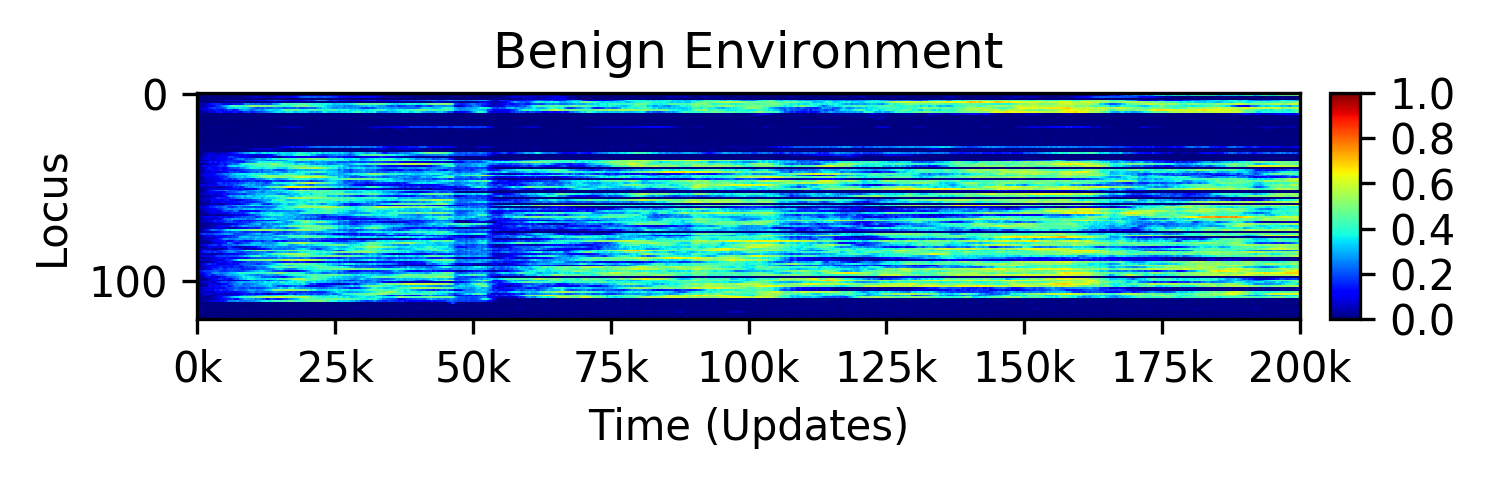

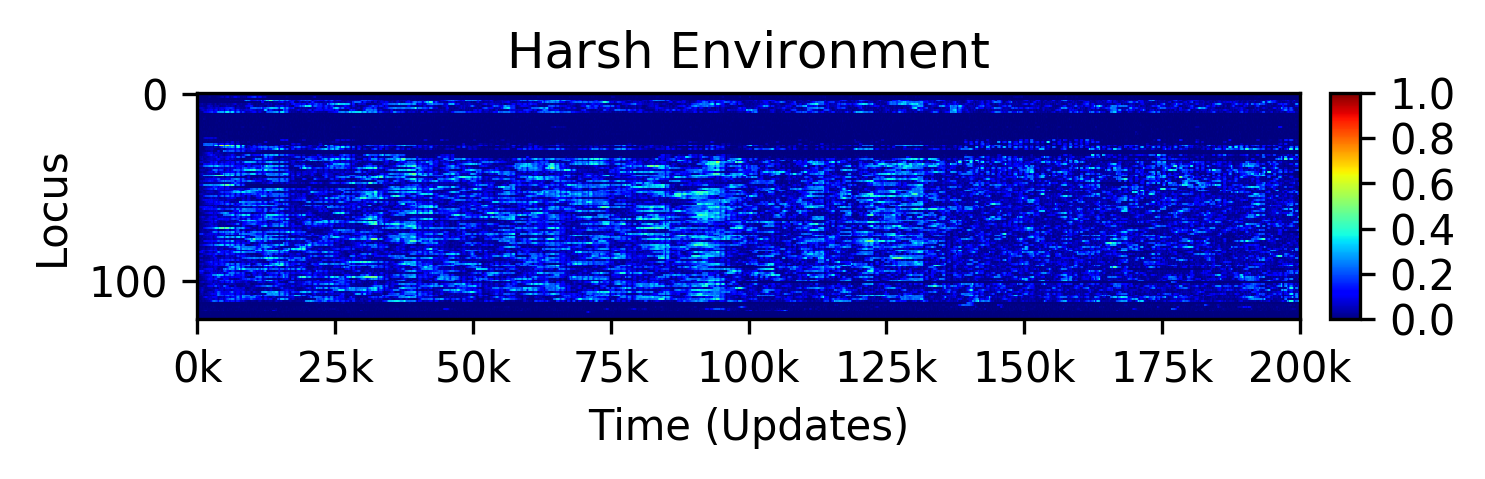

In [89]:
dat = get_data("/populations/control_intertwined_820001/")
do_fig(xsize=1700, ysize=550, 
       title="Population Entropy by Site and Genotype\n\nControl (Static) Environment",
       xlabel="Time (Updates)",
       ylabel="Locus",
       data=dat)

plt.show()
dat = get_data("/populations/noreward_intertwined_820001/")
do_fig(xsize=1700, ysize=550, 
       title="Benign Environment",
       xlabel="Time (Updates)",
       ylabel="Locus",
       data=dat)
plt.show()
dat = get_data("/populations/punish_intertwined_820001/")
do_fig(xsize=1700, ysize=550, 
       title="Harsh Environment",
       xlabel="Time (Updates)",
       ylabel="Locus",
       data=dat)